In [76]:
# Import All libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [77]:
lp  = pd.read_csv("loan_prediction.csv",names=['Loan_ID','Gender','Married','Dependends','Education','Self_Employed','Applicant Income ','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status'])

In [78]:
lp.head()

,Loan_ID,Gender,Married,Dependends,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
lp.tail()

,Loan_ID,Gender,Married,Dependends,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [80]:
lp.shape

(614, 13)

In [81]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependends', 'Education',
       'Self_Employed', 'Applicant Income ', 'CoapplicantIncome',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [82]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependends         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   Applicant Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [83]:
lp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependends           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

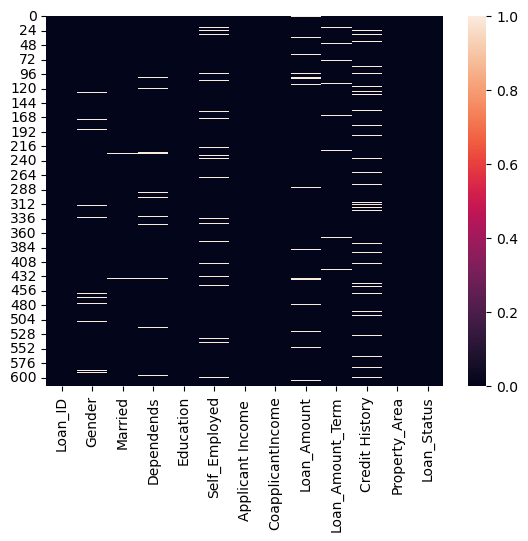

In [84]:
sns.heatmap(lp.isnull())

<AxesSubplot:>

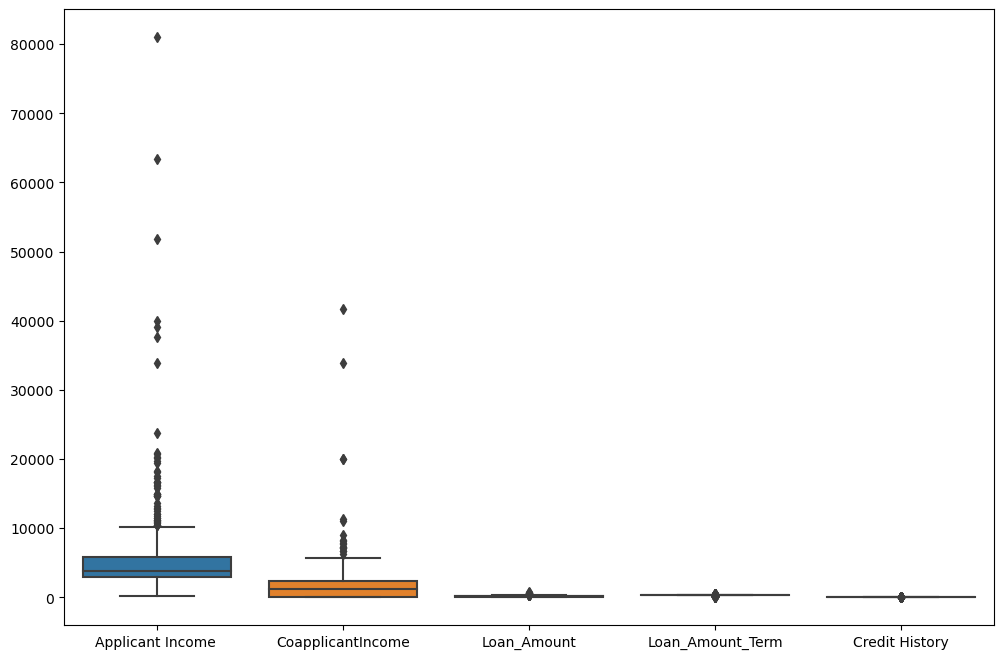

In [85]:
# Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=lp)

In [86]:
# Fill the null values of numerical datatypes

lp['Gender'].fillna(lp['Gender'].mode()[0],inplace = True)
lp['Married'].fillna(lp['Married'].mode()[0],inplace = True)
lp['Self_Employed'].fillna(lp['Self_Employed'].mode()[0],inplace = True)
lp['Dependends'].fillna(lp['Dependends'].mode()[0],inplace = True)

lp.Loan_Amount = lp.Loan_Amount.fillna(lp.Loan_Amount.mean())
lp.Loan_Amount = lp.Loan_Amount.fillna(lp.Loan_Amount.mean())

lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].mode()[0],inplace = True)
lp['Credit History'].fillna(lp['Credit History'].mode()[0],inplace = True)

lp.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependends           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
# Encoding Technique : Label Encoding one Hot Encoding 
le=LabelEncoder()
lp['Gender']=le.fit_transform(lp['Gender'])

list1=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    lp[val]=le.fit_transform(lp[val].astype(str))
    
lp  

,Loan_ID,Gender,Married,Dependends,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [88]:
lp.describe()

,Gender,Married,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

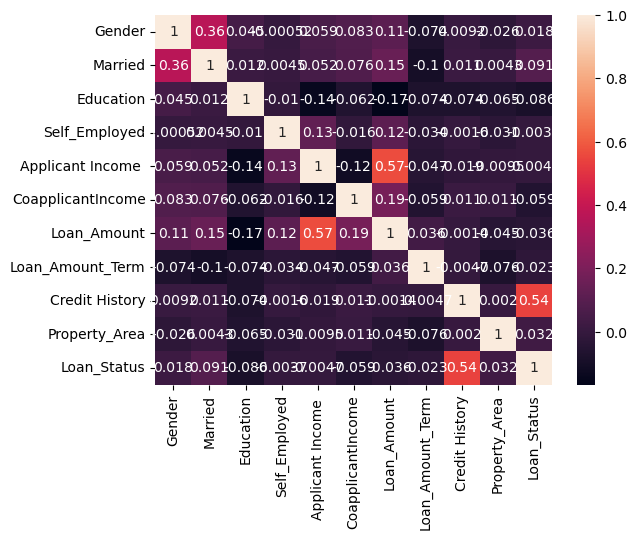

In [89]:
sns.heatmap(lp.corr(),annot=True)

who take the loan as group by gender
1    502
0    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

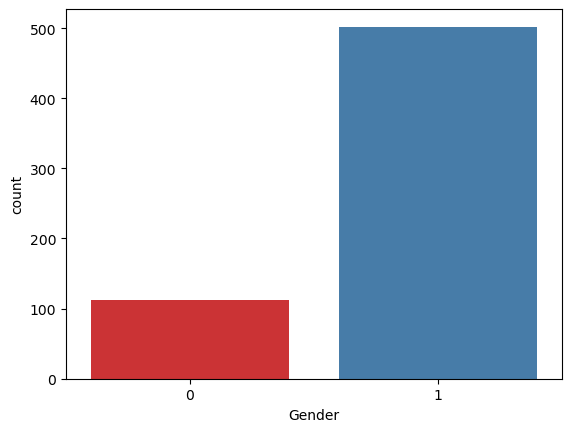

In [90]:
print("who take the loan as group by gender")
print(lp['Gender'].value_counts())
sns.countplot(x='Gender',data=lp,palette = 'Set1')

number of people who take the loan as group by marital status
1    401
0    213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

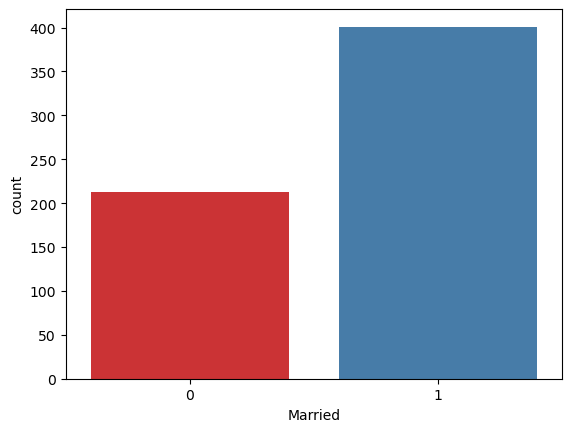

In [91]:
print("number of people who take the loan as group by marital status")
print(lp['Married'].value_counts())
sns.countplot(x='Married',data=lp,palette = 'Set1')

number of people who take the loan as group by Education
0    480
1    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

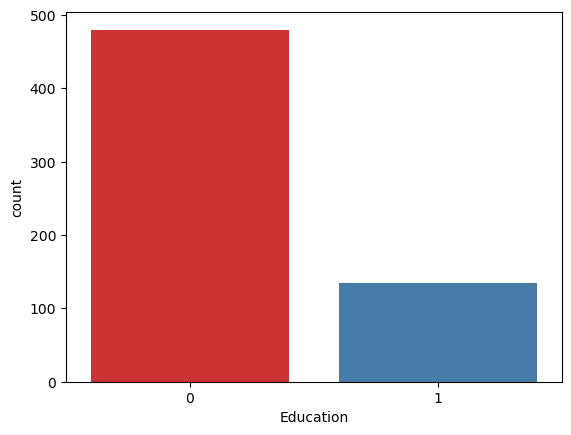

In [92]:
print("number of people who take the loan as group by Education")
print(lp['Education'].value_counts())
sns.countplot(x='Education',data=lp,palette = 'Set1')

number of people who take the loan as group by Dependends
0     360
1     102
2     101
3+     51
Name: Dependends, dtype: int64


<AxesSubplot:xlabel='Dependends', ylabel='count'>

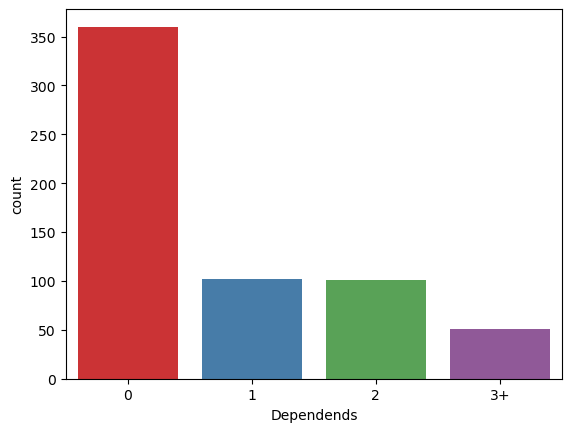

In [93]:
print("number of people who take the loan as group by Dependends")
print(lp['Dependends'].value_counts())
sns.countplot(x='Dependends',data=lp,palette = 'Set1')

number of people who take the loan as group by Self Employed
0    532
1     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

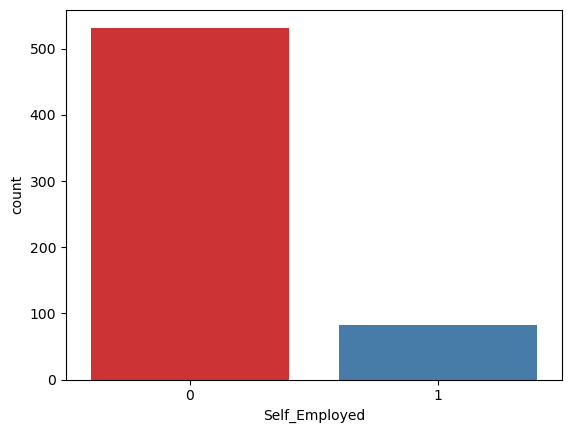

In [94]:
print("number of people who take the loan as group by Self Employed")
print(lp['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=lp,palette = 'Set1')

number of people who take the loan as group by Credit History
1.0    525
0.0     89
Name: Credit History, dtype: int64


<AxesSubplot:xlabel='Credit History', ylabel='count'>

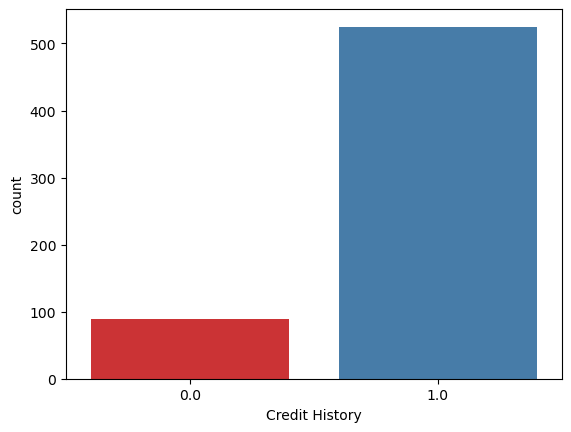

In [95]:
print("number of people who take the loan as group by Credit History")
print(lp['Credit History'].value_counts())
sns.countplot(x='Credit History',data=lp,palette = 'Set1')

<AxesSubplot:xlabel='Loan_Amountlog', ylabel='Density'>

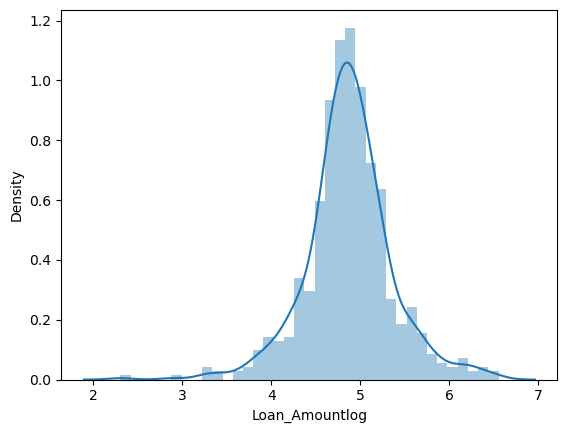

In [96]:
lp['Loan_Amountlog'] = np.log(lp['Loan_Amount']+1)
sns.distplot(lp['Loan_Amountlog'])

<AxesSubplot:xlabel='Loan_Amount_Term.log', ylabel='Density'>

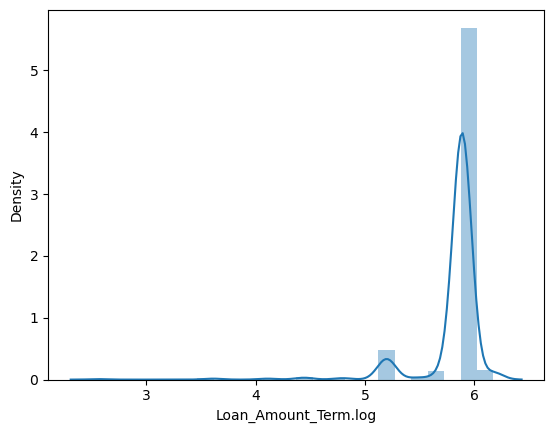

In [97]:
 lp['Loan_Amount_Term.log'] = np.log(lp['Loan_Amount_Term']+1)
sns.distplot(lp['Loan_Amount_Term.log'])

In [98]:
lp["Dependends"] = lp["Dependends"].replace(["3+"], "3")

In [101]:
# Split Independent and dependent Feature
x = lp.drop(columns=['Loan_ID','Loan_Status'])
y = lp['Loan_Status']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
print(x.shape,x_train.shape,x_test.shape)

(614, 13) (491, 13) (123, 13)


In [75]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
ydt_pred = dt.predict(x_test)

In [58]:

print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(ydt_pred,y_test))


Decision Tree Classifier Accuracy: 0.6910569105691057


In [103]:
t=np.array([1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.993232,5.888878])

In [104]:
def loan_statuss(t):
    t=t.reshape(1,-1)
    pred=dt.predict(t)
    if pred==0:
        print('Loan application not approved')
    else:
        print('Loan Application Approved')

In [105]:
loan_statuss(t)

Loan Application Approved


In [106]:
#Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)


SVC()

In [107]:
svm_accuracy = svm_classifier.score(x_test, y_test)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)

Support Vector Machine Classifier Accuracy: 0.6504065040650406


In [108]:
#Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [109]:
nb_accuracy = nb_classifier.score(x_test, y_test)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.4878048780487805


In [110]:
#KNearest Neighbors Classification
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [111]:
knn_accuracy = knn_classifier.score(x_test, y_test)
print("K Nearest Neighbors Classifier Accuracy:", knn_accuracy)

K Nearest Neighbors Classifier Accuracy: 0.5772357723577236


In [112]:
# Logistic Regression

model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred1 = model1.predict(x_test)

In [114]:
accuracy = accuracy_score(y_test,y_pred1)

In [116]:
print("LogisticRegression Accuracy:", accuracy)

LogisticRegression Accuracy: 0.7886178861788617
